## Descriptive Statistics

 Import **NumPy**, **SciPy**, and **Pandas**

In [2]:
import numpy as np
import scipy
import pandas as pd

 Randomly generate 1,000 samples from the normal distribution using `np.random.normal()`(mean = 100, standard deviation = 15)

np.random.normal(loc=0.0, scale=1.0, size=None)  #you need to modify this code.

loc will be equal to mean, scale will be equal to std deviation, size will be equal to sample size.

In [4]:
samples = np.random.normal(loc=100, scale=15, size=1000)


Compute the **mean**, **median**, and **mode**

In [15]:
mean = np.mean(samples)
median = np.median(samples)
from scipy import stats
mode = scipy.stats.mode(samples)
print("Mean is", mean, "\nMedian is", median, "\nMode is", mode)

Mean is 100.74804940836827 
Median is 100.70681658358765 
Mode is ModeResult(mode=array([54.8392277]), count=array([1]))


Compute the **min**, **max**, **Q1**, **Q3**, and **interquartile range**

In [14]:
# box plot values
min = np.min(samples)
max = np.max(samples)
q1 = np.percentile(samples, 25)
q3 = np.percentile(samples, 75)
iqr = stats.iqr(samples)
print("Min value in the array is",min, "\nMax value in the array is", max, "\nQ1 is", q1, "\nQ3 is", q3, "\nIQR is", iqr)

Min value in the array is 54.83922769740613 
Max value in the array is 147.65878952040836 
Q1 is 90.63910629993622 
Q3 is 110.8310911135249 
IQR is 20.19198481358869


Compute the **variance** and **standard deviation**

In [5]:
variance = np.var(samples)
std_dev = np.std(samples, ddof = 1)  # sample olduğu için ddof 1 yapalım
print("Variance of the samples array is", variance, "\nStandard deviation of the samples array is",std_dev)

Variance of the samples array is 223.48075312723913 
Standard deviation of the samples array is 14.956752909131847


Compute the **skewness** and **kurtosis**

You can use [`scipy.stats.skew`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) and [`scipy.stats.kurtosis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)

In [17]:
skewness = scipy.stats.skew(samples)
kurtosis = scipy.stats.kurtosis(samples)
print("Skewness is", skewness, "\n Kurtosis is", kurtosis)

Skewness is 0.053941371494541576 
 Kurtosis is -0.004525068517542419


## NumPy Correlation Calculation

Create an array x of integers between 10 (inclusive) and 20 (exclusive). Use `np.arange()`

In [4]:
x = np.arange(10,20)
print(x)

[10 11 12 13 14 15 16 17 18 19]


Then use `np.array()` to create a second array y containing 10 arbitrary integers.

In [5]:
y = np.array([1, 3, 5, 6, 8, 5, 7, 6])
# different from pandas' corr method, numpy doesn't calculate the corr coef between two arrays with different lengths.
# Therefore I will append 2 numbers to the second list
y = np.append(y, [8,9])
print(y)
print(type(x), type(y))

[1 3 5 6 8 5 7 6 8 9]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Once you have two arrays of the same length, you can compute the **correlation coefficient** between x and y

In [14]:
r = np.corrcoef(x,y)
print(r)
print()
print("Correlation coefficient between x and y arrays is", r[0][1])

[[1.         0.84212907]
 [0.84212907 1.        ]]

Correlation coefficient between x and y arrays is 0.8421290672443171


## Pandas Correlation Calculation

Run the code below

In [15]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

Call the relevant method  to calculate Pearson's r correlation.

In [19]:
r = x.corr(y)  # default pearson
print("Pearson's correlation coefficient between x and y arrays is", r)

Pearson's correlation coefficient between x and y arrays is 0.7586402890911867


OPTIONAL. Call the relevant method to calculate Spearman's rho correlation.

In [20]:
rho = x.corr(y, method = "spearman")
print("Spearman's correlation coefficient between x and y arrays is", rho)


Spearman's correlation coefficient between x and y arrays is 0.9757575757575757


## Seaborn Dataset Tips

Import Seaborn Library

In [1]:
import seaborn as sns

Load "tips" dataset from Seaborn

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Generate descriptive statistics include those that summarize the central tendency, dispersion

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Call the relevant method to calculate pairwise Pearson's r correlation of columns + heatmap

In [13]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [7]:
tips["total_bill"].corr(tips["tip"])

0.6757341092113641

In [8]:
tips["total_bill"].corr(tips["size"])

0.5983151309049022

In [9]:
tips["tip"].corr(tips["size"])

0.4892987752303577

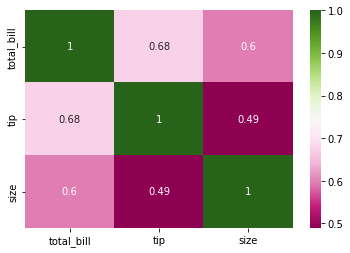

In [12]:
sns.heatmap(tips.corr(), annot= True, cmap="PiYG")